In [30]:
import pandas as pd
import matplotlib as plt
from datetime import datetime 
from sklearn.preprocessing import LabelEncoder
import seaborn as sns


In [3]:
df = pd.read_csv("train.csv")

In [24]:
df

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews,days_since_purchased,total_reviews,positive_reviews,positive_reviews_percentage
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",2018-07-02,"10 Dec, 2013",372.0,96.0,490.0,468.0,0.794872,79.487179
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",2016-11-26,"12 Aug, 2015",23.0,0.0,1073.0,23.0,1.000000,100.000000
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",2018-07-02,"28 Jan, 2014",3018.0,663.0,490.0,3681.0,0.819886,81.988590
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2016-11-28,"31 Mar, 2010",63078.0,1746.0,1071.0,64824.0,0.973066,97.306553
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2018-03-04,"30 Jul, 2012",8841.0,523.0,610.0,9364.0,0.944148,94.414780
5,5,2.933333,0,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaT,"26 Mar, 2019",NaN,NaN,601.0,NaN,NaN,NaN
6,6,2.616667,0,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...",2018-02-16,"23 Oct, 2012",39776.0,1035.0,626.0,40811.0,0.974639,97.463919
7,7,0.150000,1,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer",2018-01-29,"28 Apr, 2016",33.0,3.0,644.0,36.0,0.916667,91.666667
8,8,0.016667,0,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...",2018-11-23,"25 Feb, 2014",1875.0,39.0,346.0,1914.0,0.979624,97.962382
9,9,0.016667,0,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...",2017-12-22,"17 Oct, 2017",47.0,11.0,682.0,58.0,0.810345,81.034483


In [4]:
df.head()

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews
0,0,0.000000,False,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...","Jul 2, 2018","10 Dec, 2013",372.0,96.0
1,1,0.016667,True,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...","Nov 26, 2016","12 Aug, 2015",23.0,0.0
2,2,0.000000,False,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...","Jul 2, 2018","28 Jan, 2014",3018.0,663.0
3,3,1.533333,False,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...","Nov 28, 2016","31 Mar, 2010",63078.0,1746.0
4,4,22.333333,False,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...","Mar 4, 2018","30 Jul, 2012",8841.0,523.0


In [5]:
df.isna().sum() #checking for null values - no need to drop any columns as most have non-null values

id                        0
playtime_forever          0
is_free                   0
price                     0
genres                    0
categories                0
tags                      0
purchase_date             2
release_date              0
total_positive_reviews    2
total_negative_reviews    2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000192AEBCD278>,
      dtype=object)

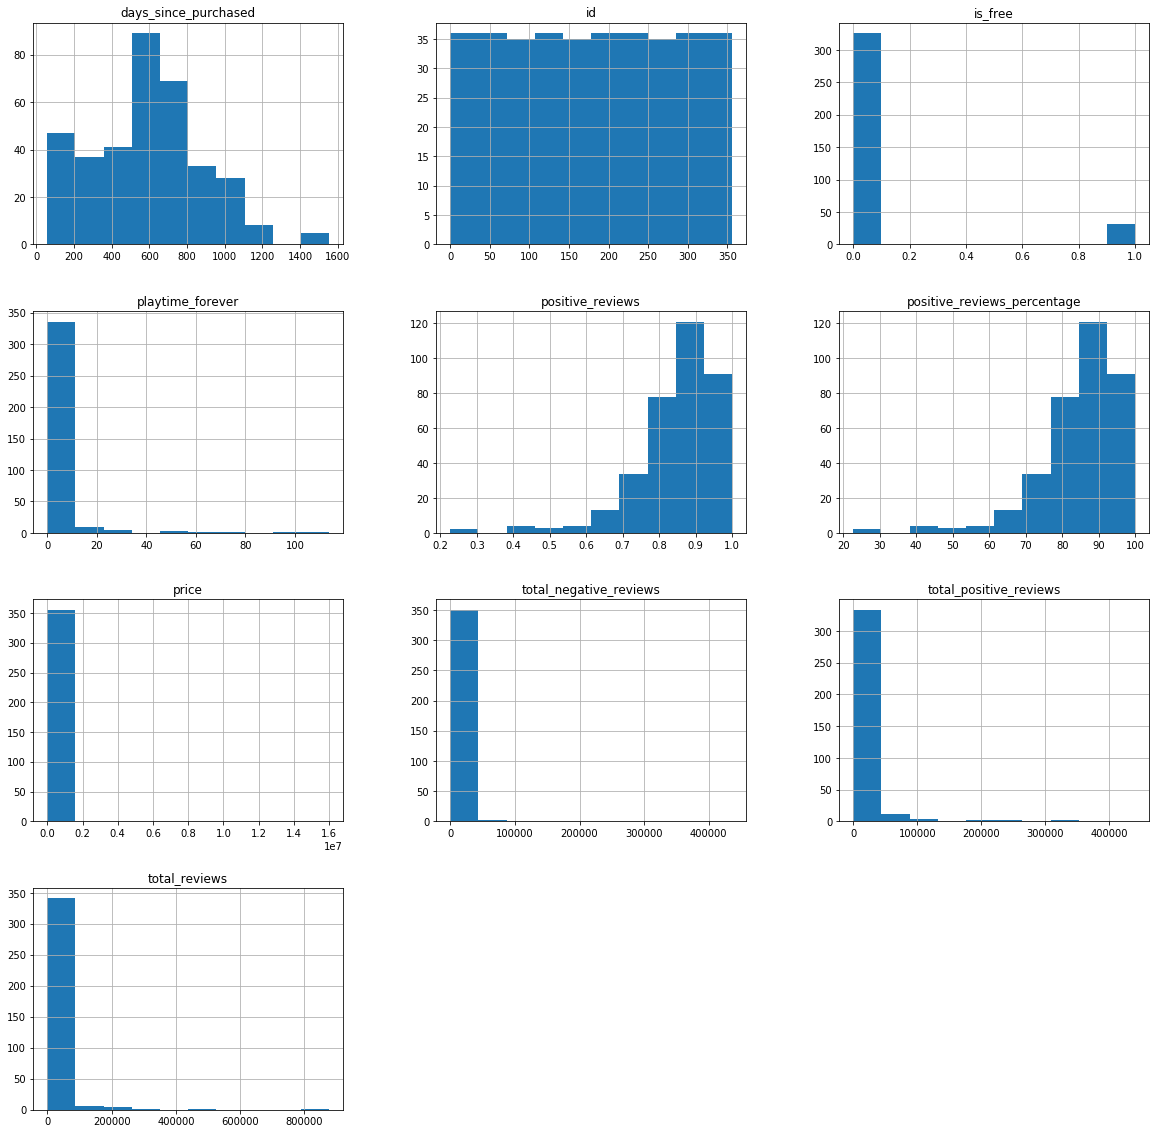

In [21]:
# Replacing columns with f/t with 0/1
df.replace({False: 0, True: 1}, inplace=True)

# Plotting the distribution of numerical and boolean categories
df.hist(figsize=(20,20))

In [29]:
df.describe()

,id,playtime_forever,is_free,price,total_positive_reviews,total_negative_reviews,days_since_purchased,total_reviews,positive_reviews,positive_reviews_percentage
count,357.00000,357.000000,357.000000,3.570000e+02,355.000000,355.000000,357.000000,355.000000,350.000000,350.000000
mean,178.00000,3.119234,0.086835,7.123277e+04,15356.115493,3348.991549,595.257703,18705.107042,0.847758,84.775790
std,103.20126,11.213114,0.281988,9.228827e+05,44032.358308,24706.625113,296.167762,63694.715761,0.115222,11.522246
min,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,58.000000,0.000000,0.227224,22.722401
25%,89.00000,0.000000,0.000000,3.600000e+03,799.000000,115.500000,372.000000,938.000000,0.799185,79.918453
50%,178.00000,0.083333,0.000000,6.800000e+03,2809.000000,437.000000,601.000000,3363.000000,0.873422,87.342233
75%,267.00000,1.616667,0.000000,9.000000e+03,9666.500000,1220.500000,740.000000,11161.000000,0.926242,92.624180
max,356.00000,113.800000,1.000000,1.599990e+07,440902.000000,436046.000000,1554.000000,876948.000000,1.000000,100.000000


Variables pairplot:


C:\Users\Kabir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Kabir\Anaconda3\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


AttributeError: module 'matplotlib' has no attribute 'show'

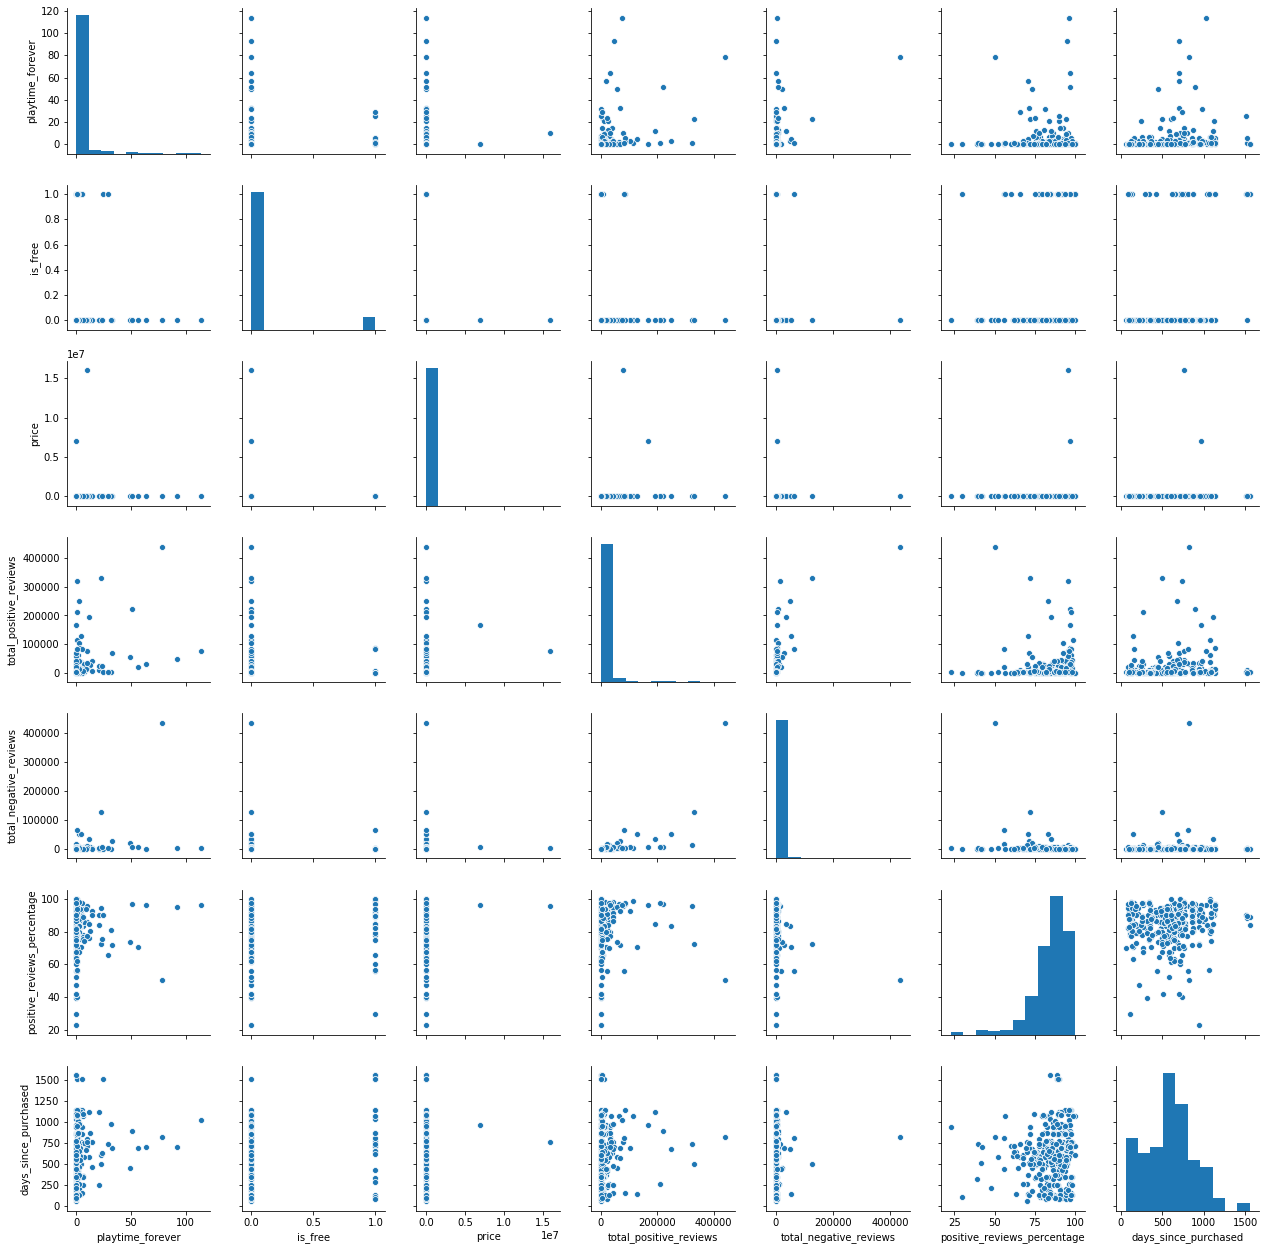

In [31]:
#variables pairplot
print('Variables pairplot:')
variables = ['playtime_forever','is_free','price','total_positive_reviews','total_negative_reviews','positive_reviews_percentage','days_since_purchased']
sns_plot = sns.pairplot(df[variables])
plt.show()

In [7]:
# Converting to datetime
df.purchase_date = pd.to_datetime(df.purchase_date) 

# Calculating the number of days
df['days_since_purchased'] = (datetime(2019, 11, 4) - df.purchase_date).astype('timedelta64[D]')

# Printing mean and median
print("Mean days since purchased:", round(df['days_since_purchased'].mean(),0))
print("Median days since purchased:", df['days_since_purchased'].median())

# Replacing null values with the median
df.days_since_purchased.fillna(df.days_since_purchased.median(), inplace=True)

Mean days since purchased: 595.0
Median days since purchased: 601.0


# Imputation

In [ ]:
threshold = 0.7
#Dropping columns with missing value rate higher than threshold
data = df[df.columns[df.isnull().mean() < threshold]]

#Dropping rows with missing value rate higher than threshold
data = df.loc[df.isnull().mean(axis=1) < threshold]

In [23]:
data 

,id,playtime_forever,is_free,price,genres,categories,tags,purchase_date,release_date,total_positive_reviews,total_negative_reviews,days_since_purchased,total_reviews,positive_reviews,positive_reviews_percentage
0,0,0.000000,0,3700.0,"Adventure,Casual,Indie","Single-player,Steam Trading Cards,Steam Cloud","Indie,Adventure,Story Rich,Casual,Atmospheric,...",2018-07-02,"10 Dec, 2013",372.0,96.0,490.0,468.0,0.794872,79.487179
1,1,0.016667,1,0.0,RPG,"Single-player,Partial Controller Support","Mod,Utilities,RPG,Game Development,Singleplaye...",2016-11-26,"12 Aug, 2015",23.0,0.0,1073.0,23.0,1.000000,100.000000
2,2,0.000000,0,5000.0,"Adventure,Casual,Indie","Single-player,Full controller support,Steam Tr...","Point & Click,Adventure,Story Rich,Comedy,Indi...",2018-07-02,"28 Jan, 2014",3018.0,663.0,490.0,3681.0,0.819886,81.988590
3,3,1.533333,0,9900.0,"Action,RPG","Single-player,Multi-player,Steam Achievements,...","Medieval,RPG,Open World,Strategy,Sandbox,Actio...",2016-11-28,"31 Mar, 2010",63078.0,1746.0,1071.0,64824.0,0.973066,97.306553
4,4,22.333333,0,4800.0,"Action,Indie,Strategy","Single-player,Co-op,Steam Achievements,Full co...","Tower Defense,Co-op,Action,Strategy,Online Co-...",2018-03-04,"30 Jul, 2012",8841.0,523.0,610.0,9364.0,0.944148,94.414780
5,5,2.933333,0,25800.0,RPG,"Single-player,Online Co-op,Local Co-op,Shared/...","RPG,Open World,Survival,Co-op,Fantasy,Online C...",NaT,"26 Mar, 2019",NaN,NaN,601.0,NaN,NaN,NaN
6,6,2.616667,0,3600.0,"Action,Indie","Single-player,Steam Achievements,Steam Trading...","Great Soundtrack,Action,Violent,Indie,Top-Down...",2018-02-16,"23 Oct, 2012",39776.0,1035.0,626.0,40811.0,0.974639,97.463919
7,7,0.150000,1,0.0,Simulation,"Single-player,Multi-player,Online Multi-Player...","VR,Simulation,Utilities,Multiplayer",2018-01-29,"28 Apr, 2016",33.0,3.0,644.0,36.0,0.916667,91.666667
8,8,0.016667,0,4000.0,"Adventure,RPG","Single-player,Steam Achievements,Steam Trading...","RPG,Turn-Based,Adventure,Fantasy,Great Soundtr...",2018-11-23,"25 Feb, 2014",1875.0,39.0,346.0,1914.0,0.979624,97.962382
9,9,0.016667,0,8800.0,"Action,Adventure","Single-player,Steam Achievements,SteamVR Colle...","Action,Adventure,VR,Shooter,Puzzle,FPS,First-P...",2017-12-22,"17 Oct, 2017",47.0,11.0,682.0,58.0,0.810345,81.034483


In [32]:
#since the dataset doesn't contain many null values, no rows/columns are dropped

# Outliers

In [ ]:
#Dropping the outlier rows with standard deviation
#factor = 3
#upper_lim = data['column'].mean () + data['column'].std () * factor
#lower_lim = data['column'].mean () - data['column'].std () * factor

#data = data[(data['column'] < upper_lim) & (data['column'] > lower_lim)]

In [8]:
df.genres.value_counts()

Adventure,Indie                                                                    40
Action,Adventure                                                                   29
Action                                                                             26
Action,Adventure,Indie                                                             18
RPG                                                                                16
Indie,Simulation,Strategy                                                          13
Action,Adventure,RPG                                                               11
Action,RPG                                                                         11
Adventure                                                                          11
Action,Indie                                                                       11
Strategy                                                                            9
Adventure,Indie,RPG,Strategy                          

In [33]:
df.categories.value_counts()

Single-player,Steam Achievements,Full controller support,Steam Trading Cards,Steam Cloud                                                                                                                                                                   39
Single-player,Steam Achievements,Steam Trading Cards,Steam Cloud                                                                                                                                                                                           22
Single-player                                                                                                                                                                                                                                              20
Single-player,Steam Achievements,Steam Trading Cards                                                                                                                                                                                          

In [9]:
new = df['genres'].str.split(",", expand = True) 

In [10]:
new

,0,1,2,3,4,5,6,7
0,Adventure,Casual,Indie,None,None,None,None,None
1,RPG,None,None,None,None,None,None,None
2,Adventure,Casual,Indie,None,None,None,None,None
3,Action,RPG,None,None,None,None,None,None
4,Action,Indie,Strategy,None,None,None,None,None
5,RPG,None,None,None,None,None,None,None
6,Action,Indie,None,None,None,None,None,None
7,Simulation,None,None,None,None,None,None,None
8,Adventure,RPG,None,None,None,None,None,None
9,Action,Adventure,None,None,None,None,None,None


In [11]:
dummy= pd.get_dummies(new)

In [12]:
dummy

,0_Action,0_Adventure,0_Animation & Modeling,0_Casual,0_Design & Illustration,0_Free to Play,0_Gore,0_Indie,0_Massively Multiplayer,0_RPG,...,5_Indie,5_Massively Multiplayer,5_Simulation,5_Sports,5_Strategy,6_Early Access,6_Indie,6_RPG,6_Strategy,7_Simulation
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#use dummy variables

In [14]:
df['total_positive_reviews'].mean(axis=0)

15356.115492957746

In [15]:
df['total_reviews'] = df['total_positive_reviews']+df['total_negative_reviews']

In [16]:
df['total_reviews']

0        468.0
1         23.0
2       3681.0
3      64824.0
4       9364.0
5          NaN
6      40811.0
7         36.0
8       1914.0
9         58.0
10      6593.0
11       183.0
12       370.0
13     10717.0
14      6422.0
15       197.0
16     22855.0
17     47145.0
18     38711.0
19       189.0
20      1370.0
21     10186.0
22     22284.0
23         2.0
24      8270.0
25     10083.0
26      5598.0
27      3829.0
28       402.0
29     37864.0
        ...   
327     1178.0
328     1921.0
329      286.0
330      420.0
331    16239.0
332      164.0
333     1058.0
334    28012.0
335      820.0
336     2043.0
337     2755.0
338     6623.0
339     6328.0
340       58.0
341       74.0
342     1250.0
343      701.0
344     7216.0
345    32139.0
346     2019.0
347    31019.0
348      326.0
349     3285.0
350    14225.0
351      129.0
352      241.0
353    23857.0
354     6818.0
355      877.0
356     1017.0
Name: total_reviews, Length: 357, dtype: float64

In [17]:
df['positive_reviews']=df['total_positive_reviews']/df['total_reviews']
df['positive_reviews_percentage']=df['positive_reviews'].mul(100)

In [18]:
df['positive_reviews_percentage'].mean(axis=0)

84.77579041028456

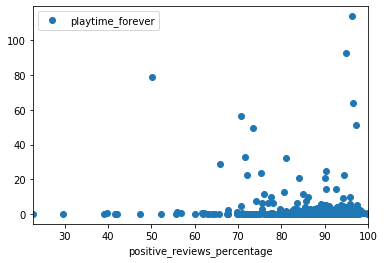

In [19]:
df.plot(x='positive_reviews_percentage',y='playtime_forever',style='o')

AttributeError: module 'matplotlib' has no attribute 'show'

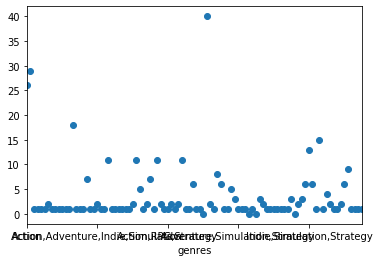

In [20]:
df.groupby('genres')['positive_reviews'].nunique().plot(style='o')
plt.show()